# Импорт библиотек

In [88]:
import os
import numpy as np
import pandas as pd
import missingno as msn

pd.options.mode.chained_assignment = None

In [89]:
import seaborn as sns
from matplotlib import style
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

sns.set()
style.use('fivethirtyeight')

In [90]:
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [91]:
# from tensorflow import keras
# from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import StandardScaler

# Загрузка и проверка датасета

In [92]:
data = pd.read_csv('heart.csv')

In [93]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [94]:
data.shape

(918, 12)

In [95]:
data.nunique().to_frame().rename(columns={0: 'parameters'})

,parameters
Age,50
Sex,2
ChestPainType,4
RestingBP,67
Cholesterol,222
FastingBS,2
RestingECG,3
MaxHR,119
ExerciseAngina,2
Oldpeak,53


In [96]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


# Пропущенные значения

Text(0.5, 1.11, 'Пропущенные значения')

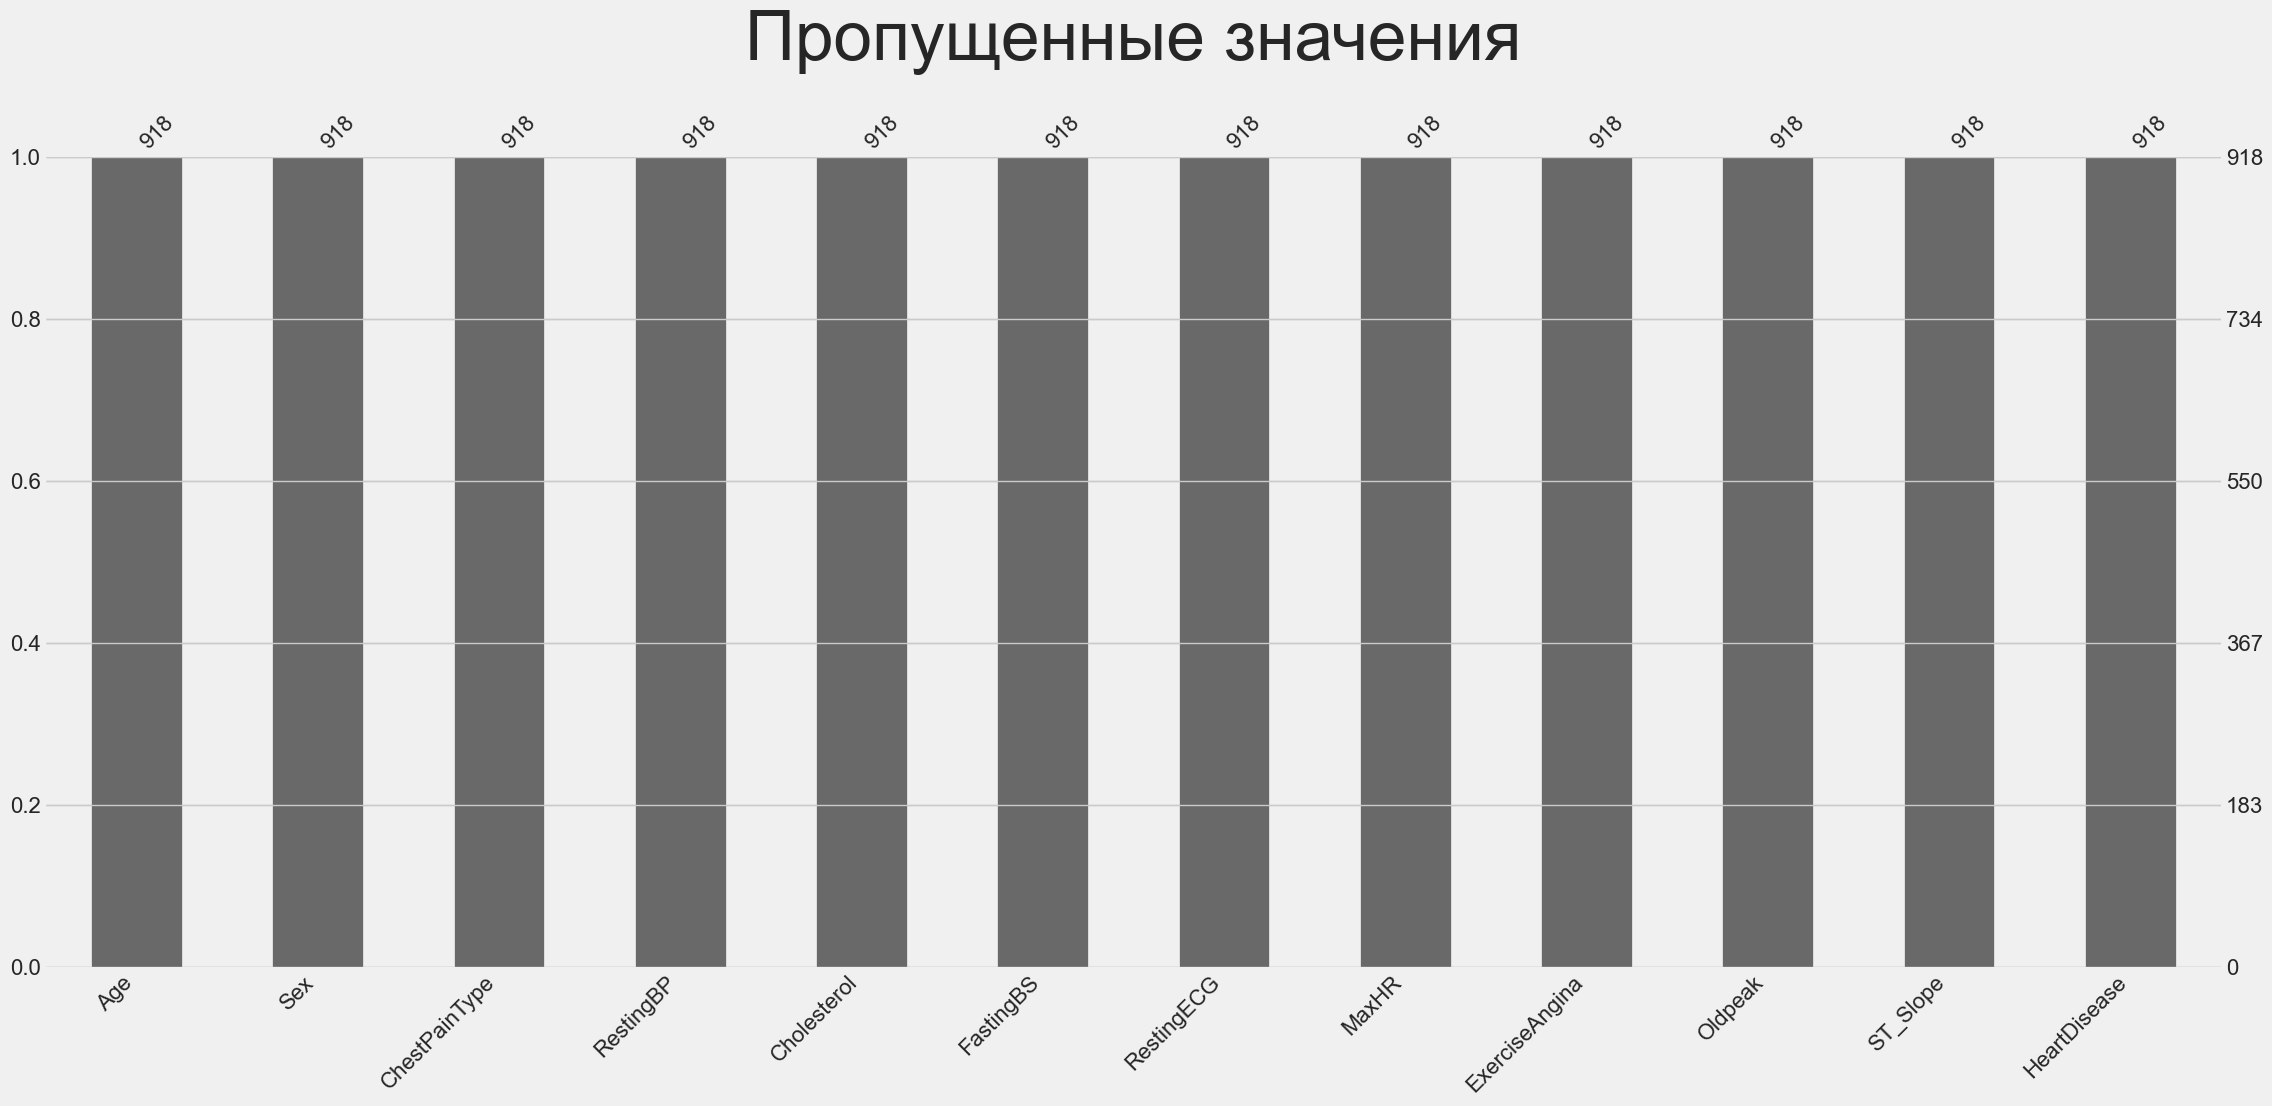

In [97]:
msn.bar(data).set_title('Пропущенные значения', size=50, y=1.11)

# Распределение классов таргета

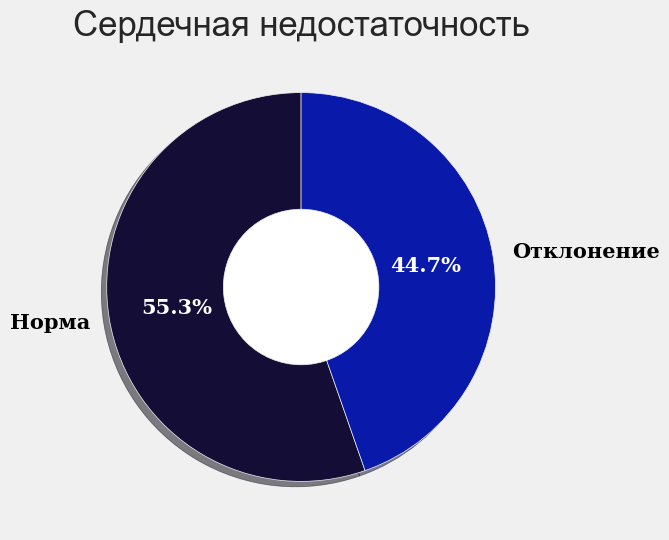

In [98]:
pie_colors = ('#140E36', '#091AAB')

pred_classes = data.HeartDisease.value_counts()

plt.figure(figsize=(12, 6))
patches, texts, pcts = plt.pie(pred_classes,
        labels=['Норма', 'Отклонение'],
        colors=pie_colors,
        pctdistance=0.65,
        shadow=True,
        startangle=90,
        autopct='%1.1f%%',
        textprops={'fontsize': 15,
                   'color': 'black',
                   'weight': 'bold',
                   'family': 'serif'})
plt.setp(pcts, color='white')
plt.title('Сердечная недостаточность', size=25)

centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Анализ признаков

In [99]:
colors = ['lightcoral','deepskyblue',
          'orchid',    'tomato',
          'teal',      'darkcyan',
          'limegreen', 'darkorange']

def distribution_plot(column, title):

    fig = plt.figure(figsize=(17, 7))
    grid = GridSpec(nrows=2, ncols=1, figure=fig)
    color = np.random.choice(colors, 1)[0]

    ax0 = fig.add_subplot(grid[0, :])
    ax0.set_title(f'Гистограмма и бокс-плот для {title}', y=1.05)
    sns.histplot(column, ax=ax0, color=color)
    
    print(f'Skewness of {title} =======>>> {np.round(column.skew(), 3)}')

    ax1 = fig.add_subplot(grid[1, :])
    plt.axis('off')
    sns.boxplot(x=column, ax=ax1, color=color)

### Возраст

Skewness of Age =======>>> -0.196


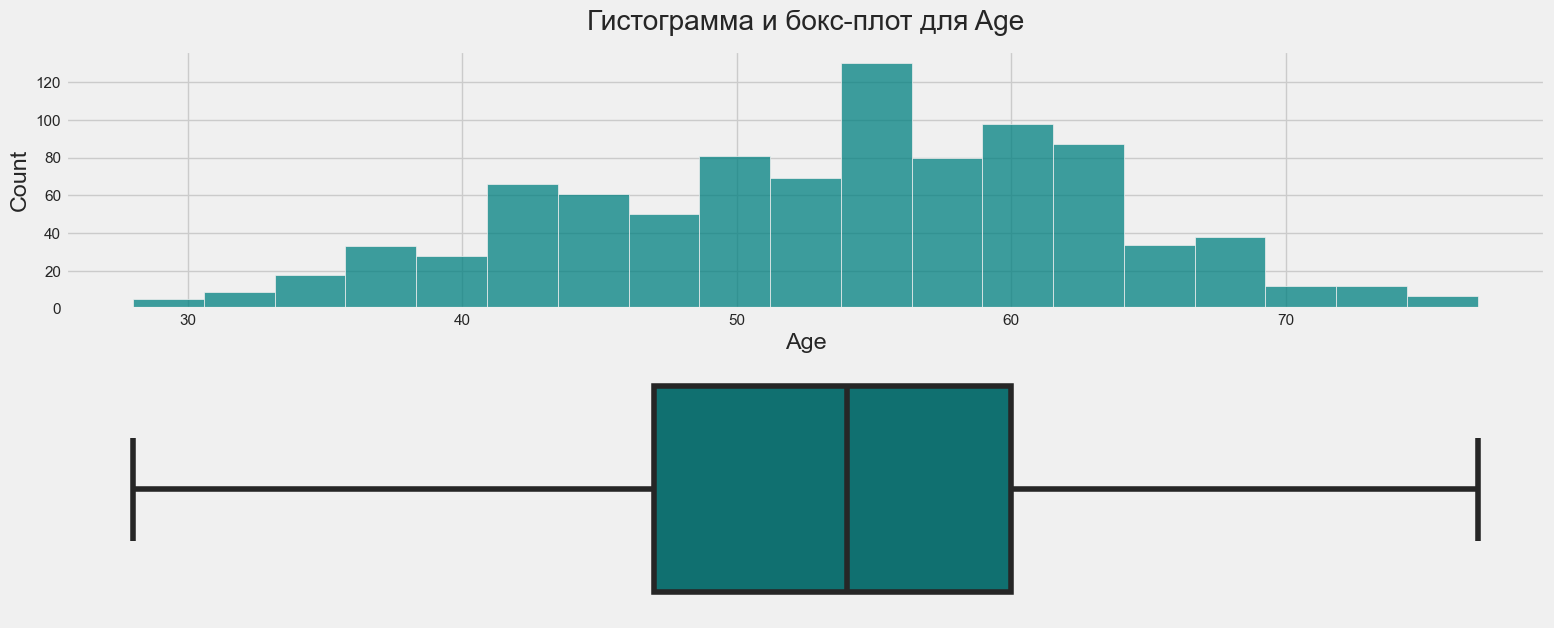

In [100]:
distribution_plot(data.Age, 'Age')

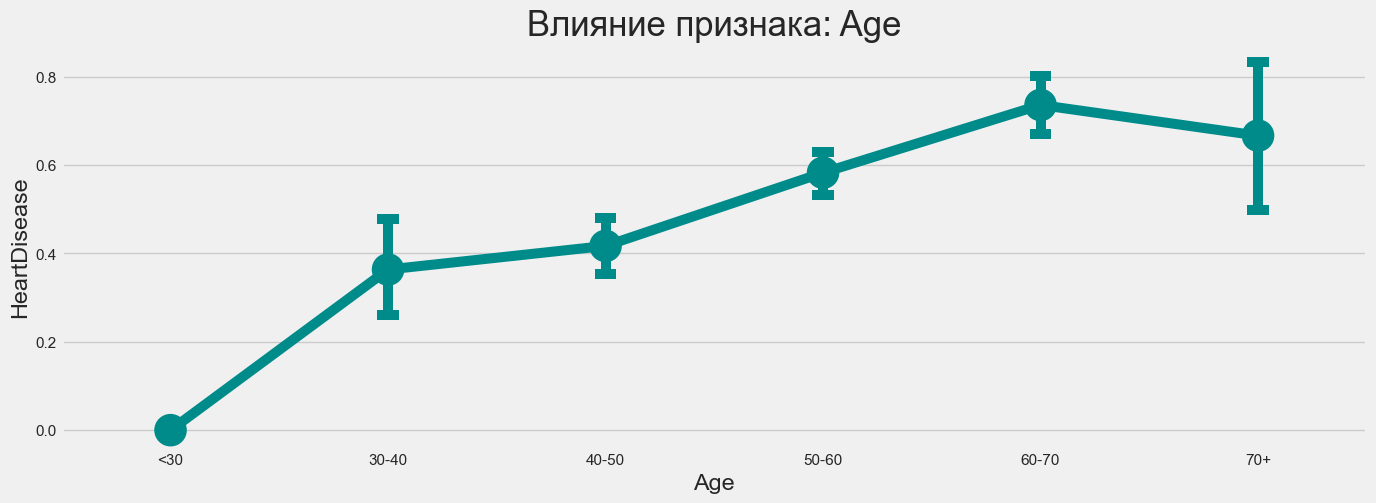

In [101]:
def age_plot(data, col_name):

    age_data = data[[col_name, 'HeartDisease']]
    age_data[col_name] = pd.cut(age_data[col_name],
                               bins=[0, 30, 40, 50, 60, 70, 100],
                               labels=['<30',
                                       '30-40',
                                       '40-50',
                                       '50-60',
                                       '60-70',
                                       '70+'])

    color = np.random.choice(colors, 1)[0]
    plt.figure(figsize=(15, 5))
    sns.pointplot(x=col_name, y='HeartDisease',
                  dodge=0.1, capsize=.1, data=age_data, color=color) \
                 .set_title(f'Влияние признака: {col_name}', fontsize=25)


age_plot(data, 'Age')

### Вывод о возрасте:
#### Существует тенденция, о которой можно судить, что с возрастом увеличивается вероятность сердечной недостаточности

### Пол

[Text(0, 0, 'M'), Text(1, 0, 'F')]

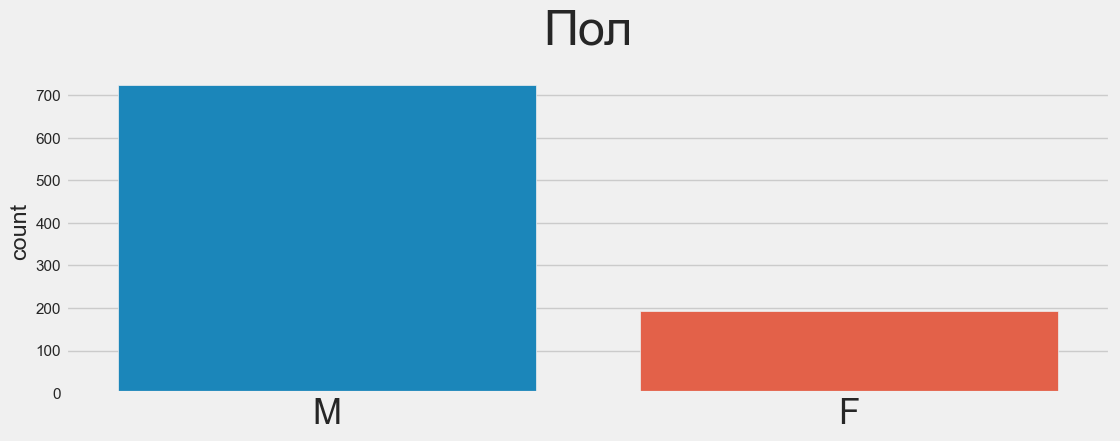

In [102]:
plt.figure(figsize=(12, 4))
gender_plot = sns.countplot(x=data.Sex)
gender_plot.set_title('Пол', fontsize=35, y=1.05)
gender_plot.set(xlabel=None)
gender_plot.set_xticklabels(gender_plot.get_xticklabels(), size=25)

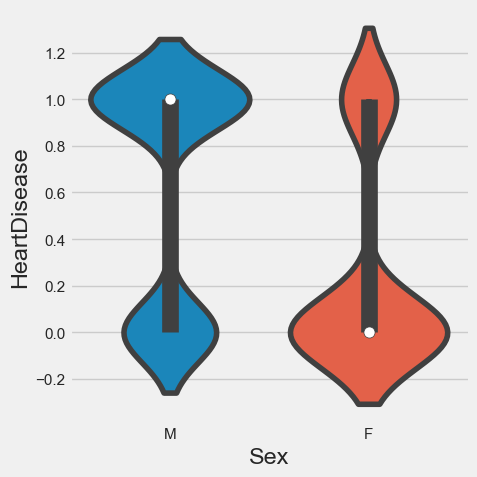

In [103]:
sns.catplot(x='Sex', y='HeartDisease', data=data, kind='violin')

### Виды боли в груди:
- TA  -> Типичная ангина
- ATA -> Атипичная стенокардия
- NAP -> Боль, не вызывнная ангиной
- ASY -> Асимптоматика

<AxesSubplot:xlabel='ChestPainType', ylabel='HeartDisease'>

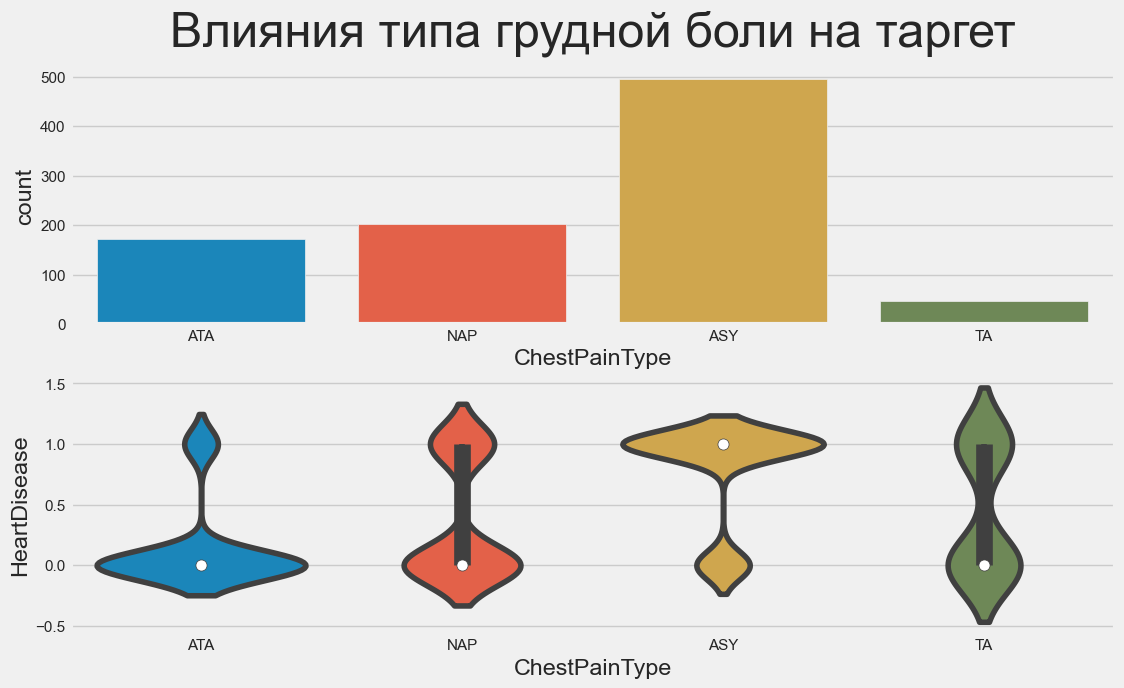

In [104]:
fig = plt.figure(figsize=(12, 7))
grid = GridSpec(ncols=1, nrows=2, figure=fig)

ax1 = fig.add_subplot(grid[0, :])
pain_type_plot = sns.countplot(x=data.ChestPainType, ax=ax1)
pain_type_plot.set_title('Влияния типа грудной боли на таргет',
                         fontsize=35, y=1.05)

ax2 = fig.add_subplot(grid[1, :])
sns.violinplot(x=data.ChestPainType, y='HeartDisease', data=data, ax=ax2)

#### Вывод:
Бессимптомность в большинстве случаев сильнее влияет на
прогрессирование болезни, в то время как пациенты с
атипичной стенокардией имеют меньше (в среднем) проблем с сердечно-сосудистыми заболеваниями.


### Кровяное давление в состоянии покоя [mm Hg]

Skewness of Resting blood pressure =======>>> 0.18


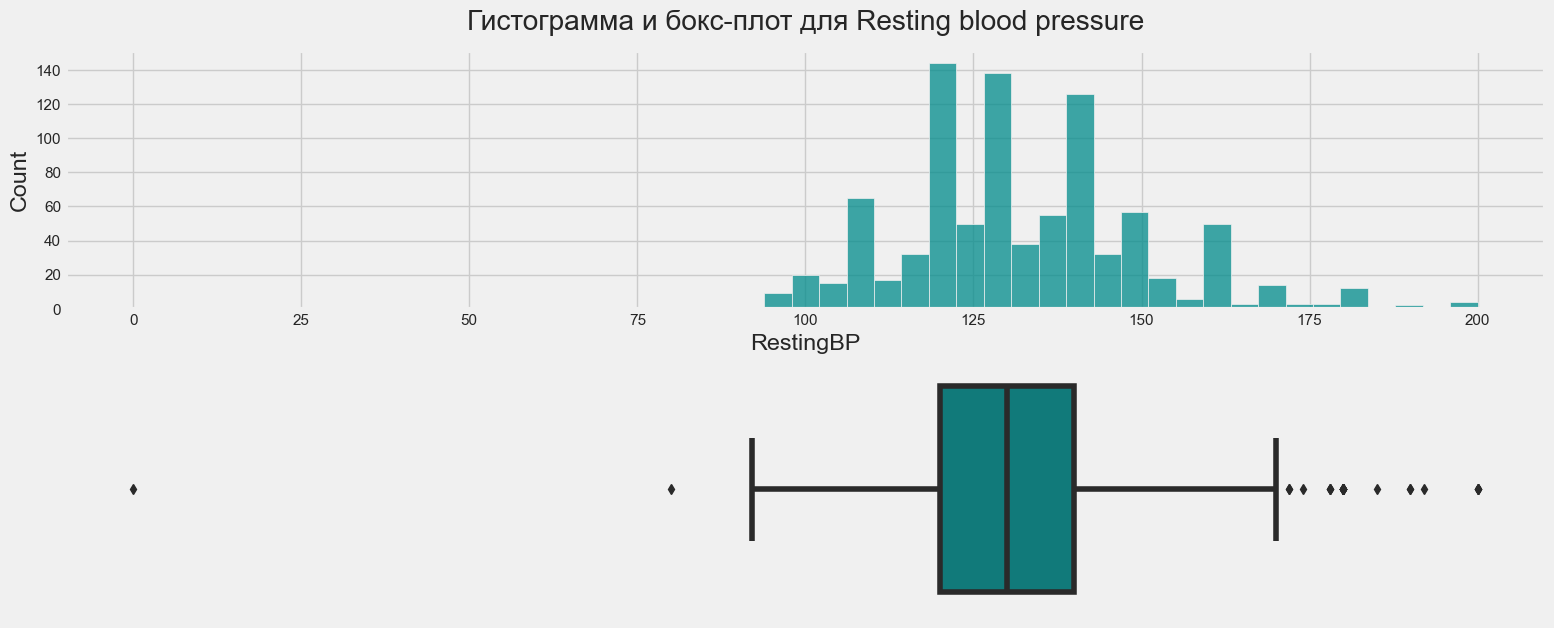

In [105]:
distribution_plot(data.RestingBP, 'Resting blood pressure')

In [106]:
minimal_pressure = data[data.RestingBP < 50]
minimal_pressure

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


#### Стоит удалить выбросы

In [107]:
data = data[data.RestingBP > 50]

Skewness of Resting blood pressure =======>>> 0.607


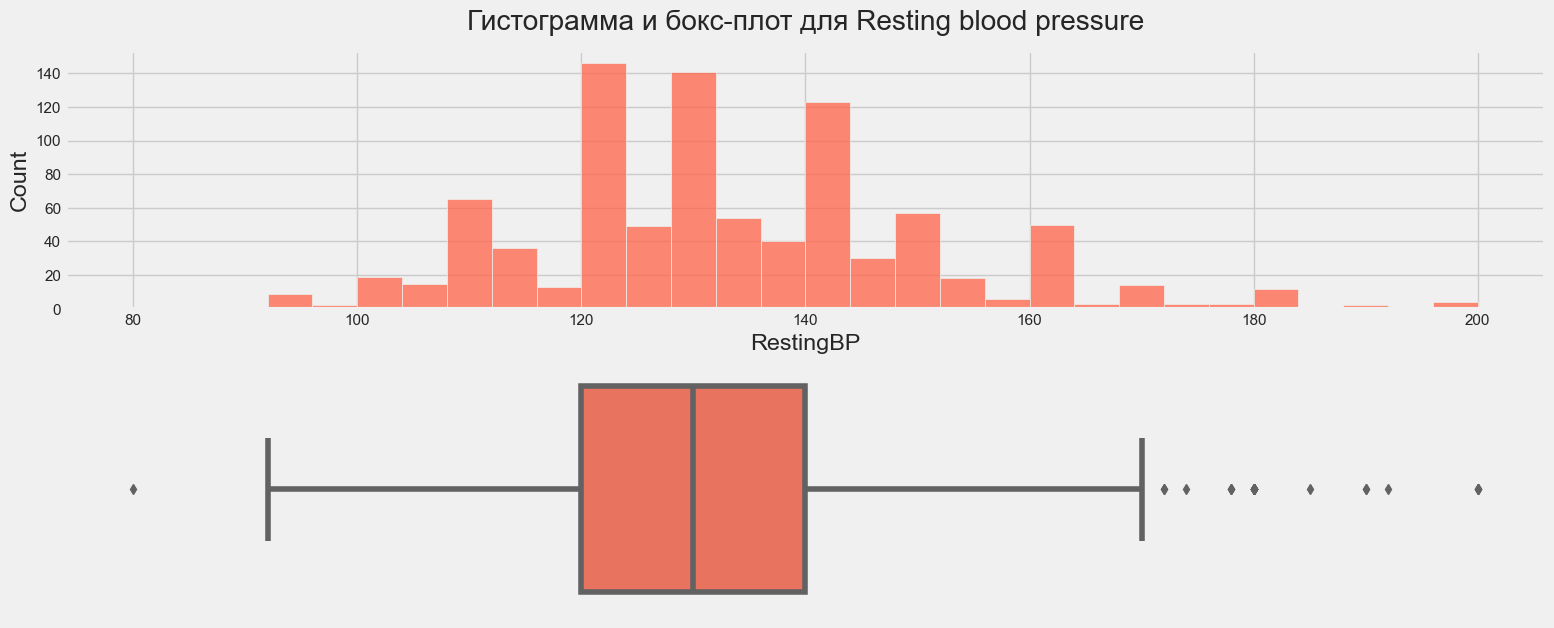

In [108]:

distribution_plot(data.RestingBP, 'Resting blood pressure')

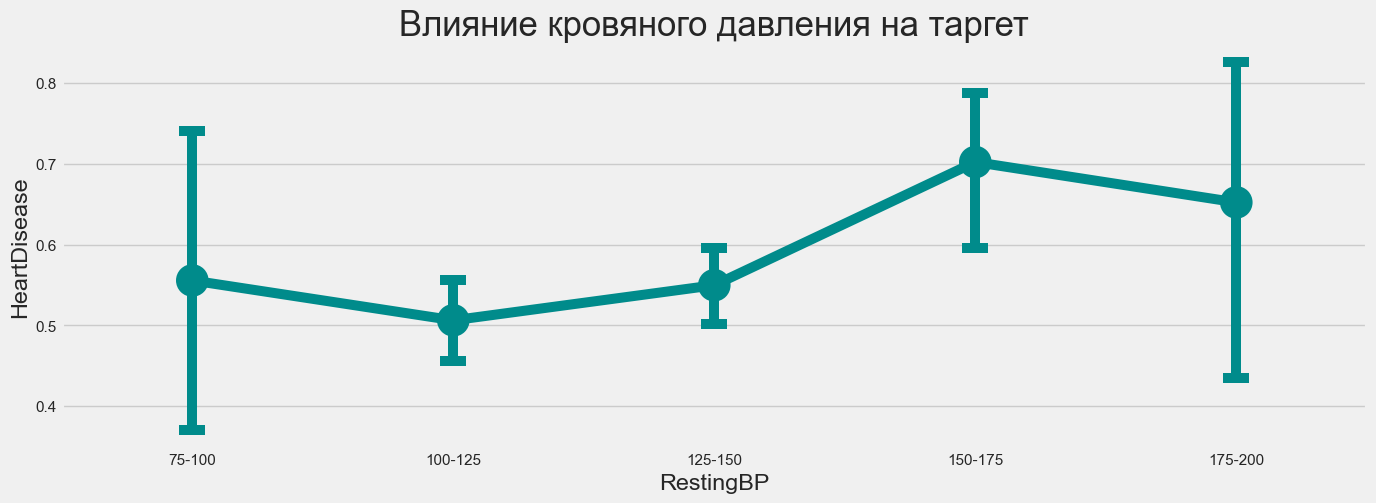

In [109]:
def pressure_plot(data, col_name):

    pressure_data = data[[col_name, 'HeartDisease']]
    pressure_data[col_name] = pd.cut(pressure_data[col_name],
                               bins=[75, 100, 125, 150, 175, 200],
                               labels=['75-100',
                                       '100-125',
                                       '125-150',
                                       '150-175',
                                       '175-200'])

    color = np.random.choice(colors, 1)[0]
    plt.figure(figsize=(15, 5))
    sns.pointplot(x=col_name, y='HeartDisease',
                  dodge=0.1, capsize=.1, data=pressure_data, color=color) \
                 .set_title(f'Влияние кровяного давления на таргет', fontsize=25)


pressure_plot(data, 'RestingBP')

### Холестерин в крови [mm/dl]

Skewness of Cholesterol =======>>> -0.612


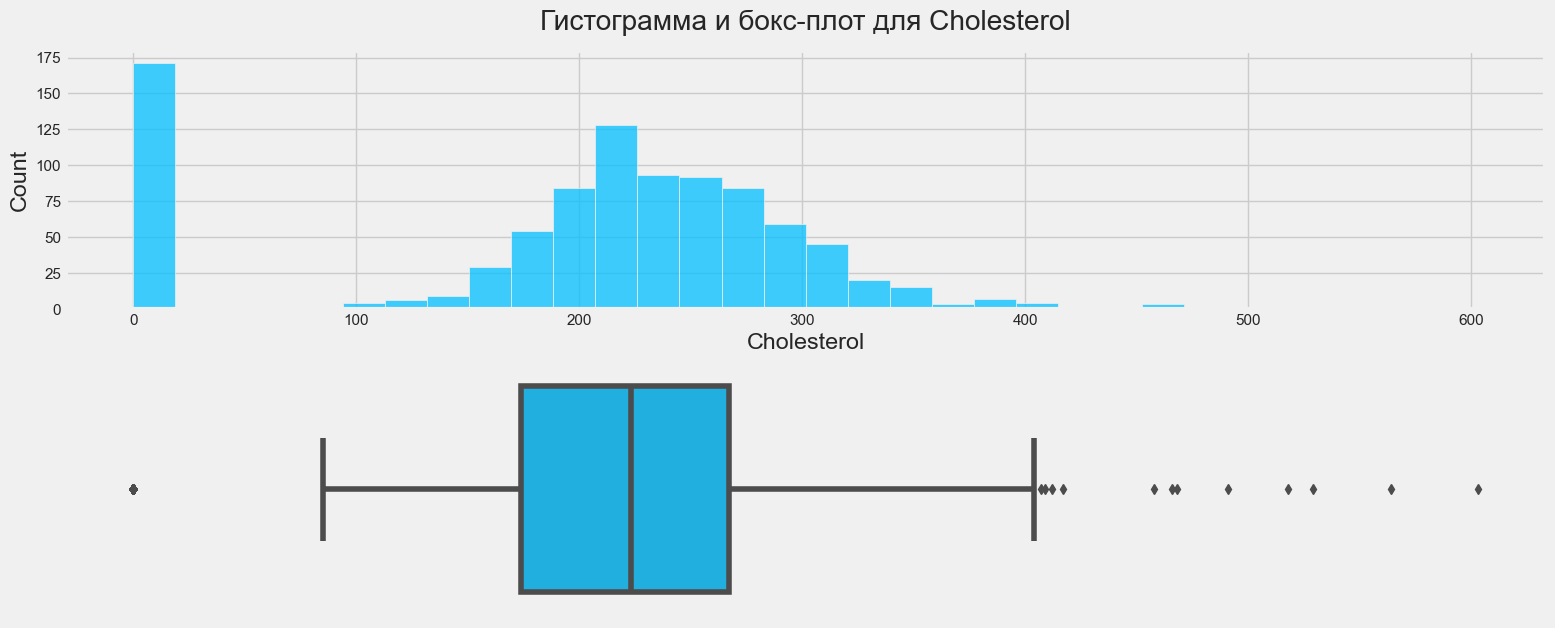

In [110]:
distribution_plot(data.Cholesterol, 'Cholesterol')

In [111]:
data = data[data.Cholesterol != 0]

Skewness of Cholesterol =======>>> 1.239


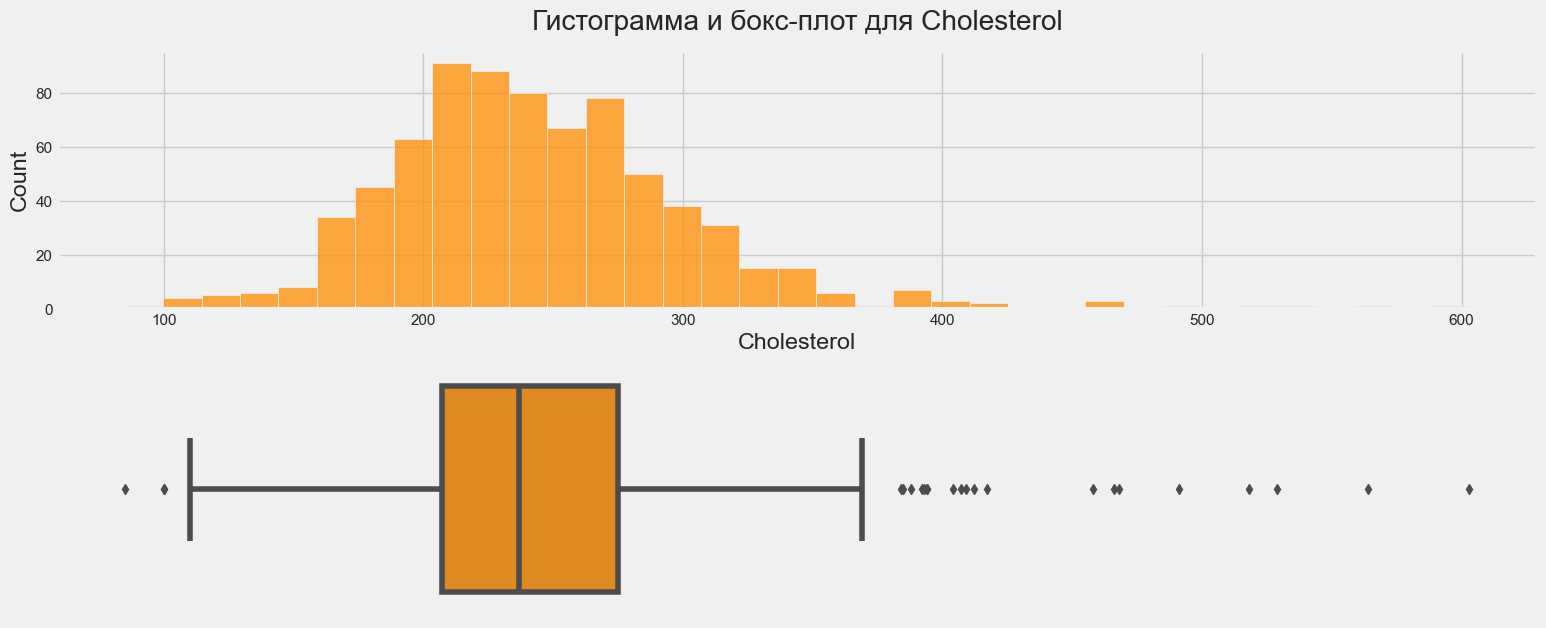

In [112]:
distribution_plot(data.Cholesterol, 'Cholesterol')

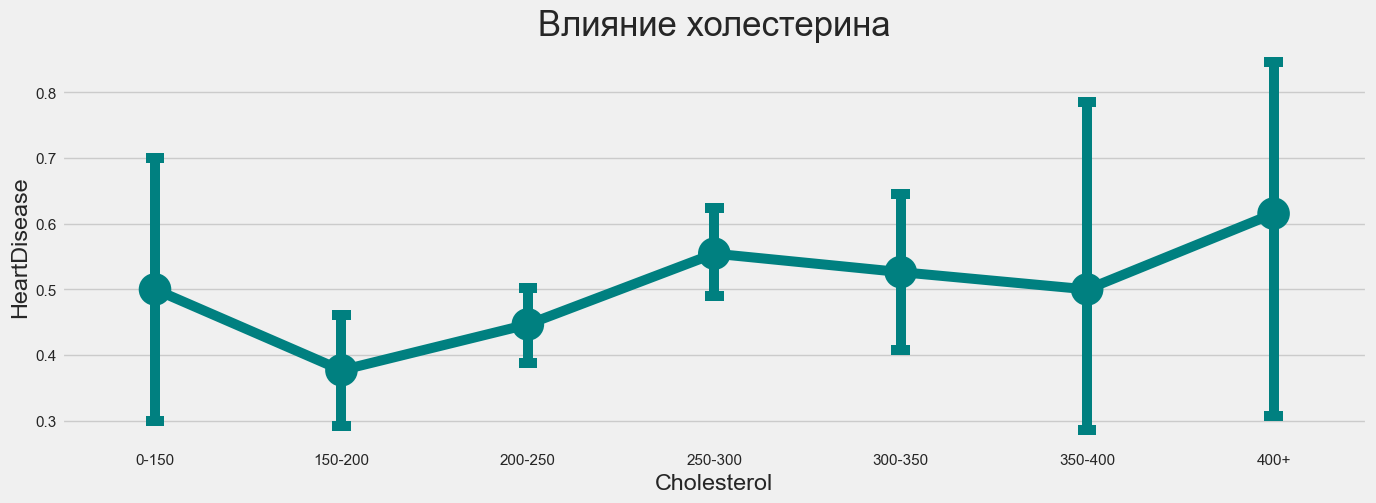

In [113]:
def cholesterol_plot(data, col_name):

    cholesterol_data = data[[col_name, 'HeartDisease']]
    cholesterol_data[col_name] = pd.cut(cholesterol_data[col_name],
                               bins=[0, 150, 200, 250, 300, 350, 400, 1000],
                               labels=['0-150',
                                       '150-200',
                                       '200-250',
                                       '250-300',
                                       '300-350',
                                       '350-400',
                                       '400+'])

    color = np.random.choice(colors, 1)[0]
    plt.figure(figsize=(15, 5))
    sns.pointplot(x=col_name, y='HeartDisease',
                  dodge=0.1, capsize=.1, data=cholesterol_data, color=color) \
                 .set_title(f'Влияние холестерина', fontsize=25)


cholesterol_plot(data, 'Cholesterol')

### Сахар в крови натощак
- 1 -> Значени > 120 мг/дл
- 0 -> Ниже порога

[Text(0, 0, '>120'), Text(1, 0, 'other')]

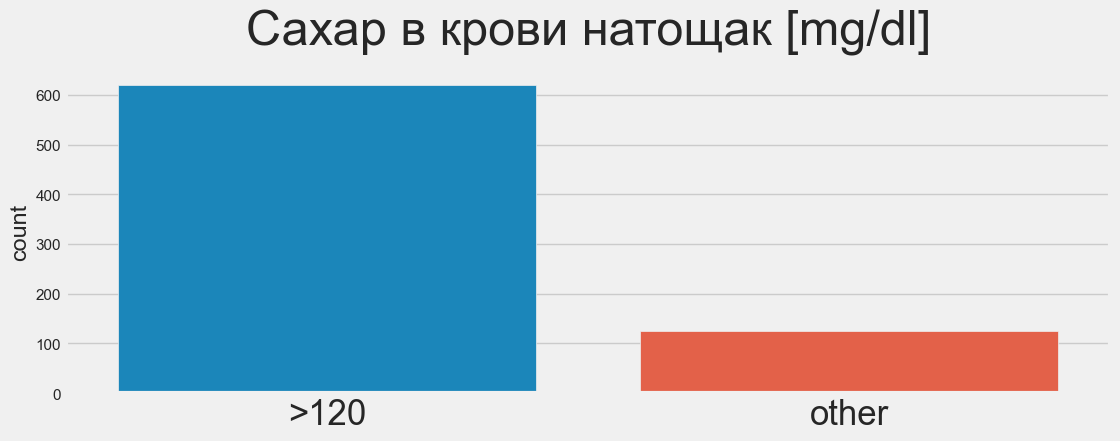

In [114]:
plt.figure(figsize=(12, 4))
active_plot = sns.countplot(x=data.FastingBS)
active_plot.set_title('Сахар в крови натощак [mg/dl]', fontsize=35, y=1.05)
active_plot.set(xlabel=None)
active_plot.set_xticklabels(['>120', 'other'], size=25)

Text(0.5, 1.05, 'Влияния сахара в крови натощак')

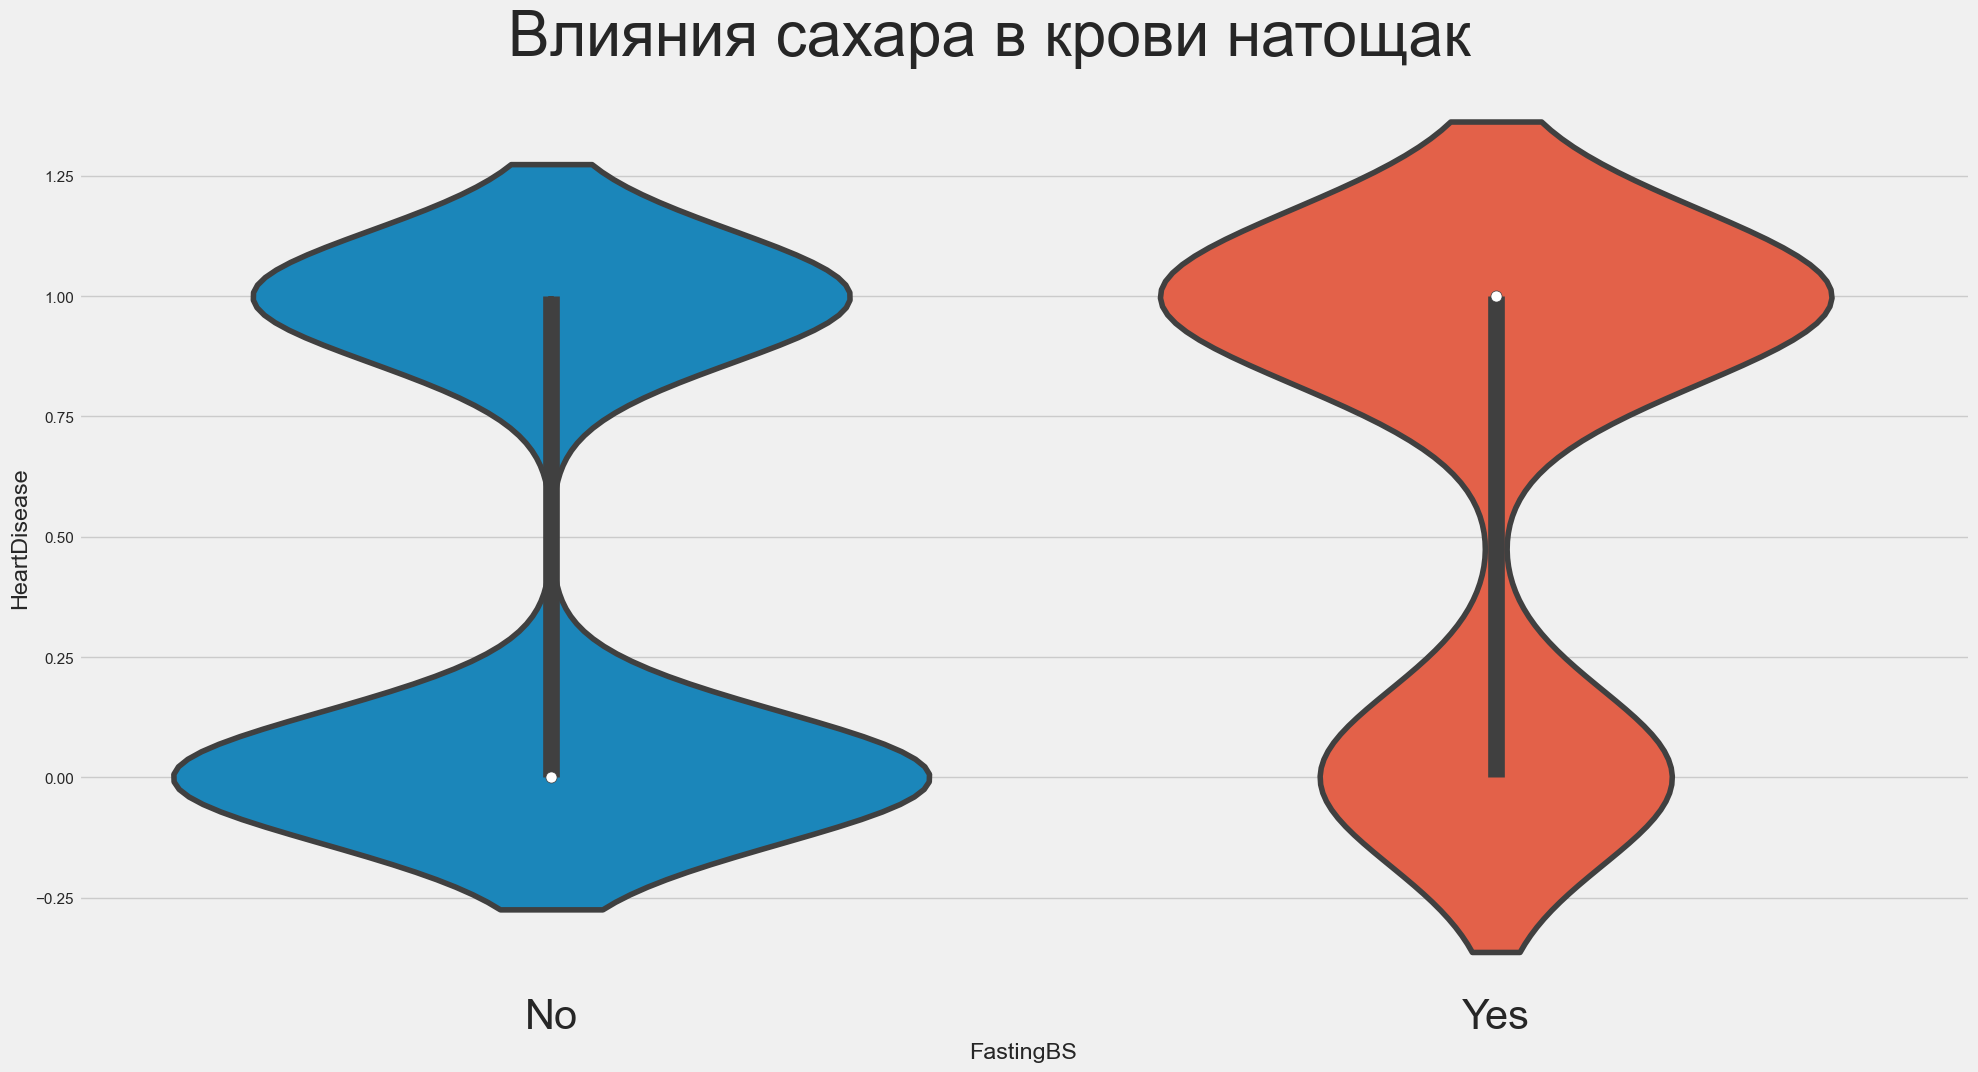

In [115]:
sugar_plot = sns.catplot(x='FastingBS', y='HeartDisease', data=data, height=10, aspect=2, kind='violin')
sugar_plot.set_xticklabels(['No', 'Yes'], size=30)
sugar_plot.fig.suptitle('Влияния сахара в крови натощак', size=45, y=1.05)

### Результаты электрокардиограммы в состоянии покоя
- Номальное
- ST     -> с патологией ST-T волн
- LVH    -> показывая вероятную или определенную гипертрофию левого желудочка по критериям Эстеса

[None, None, None, None, None, None]

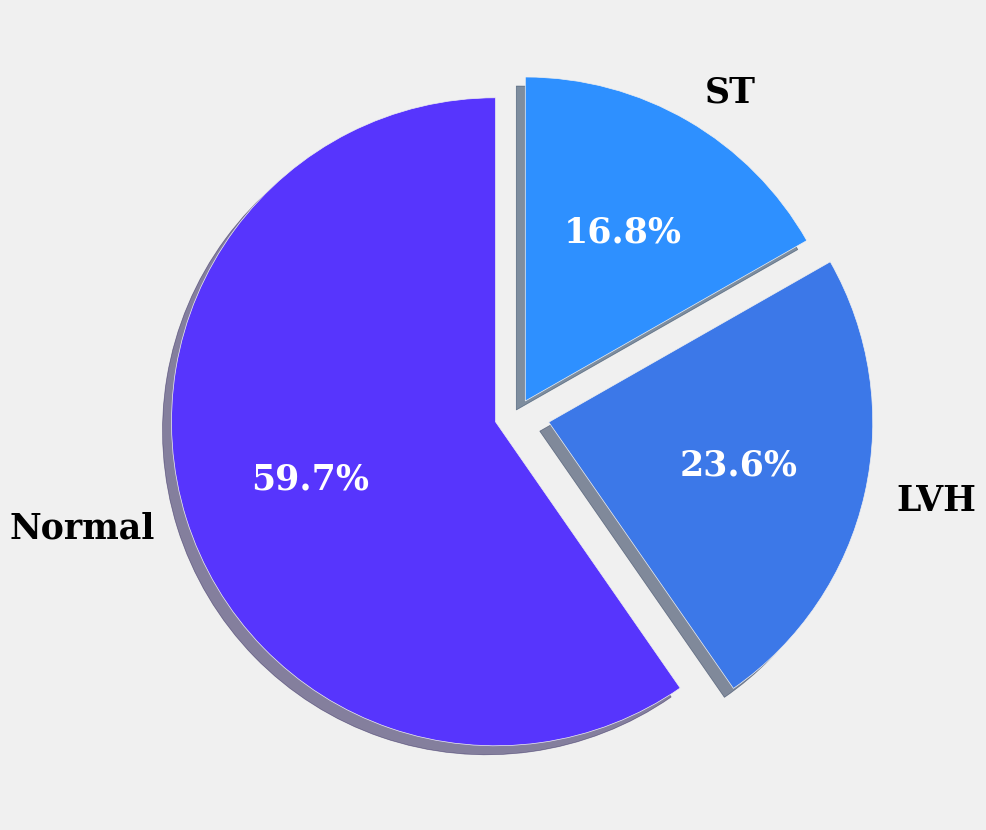

In [116]:
cardiogram_data = data.RestingECG.value_counts()

explode = (0.07, 0.1, 0.05)
pie_colors = ('#5735FD', '#3C78E8', '#2E90FF')

plt.figure(figsize=(15, 10))
patches, texts, pcts = plt.pie(cardiogram_data,
        labels=cardiogram_data.index,
        explode=explode,
        colors=pie_colors,
        shadow=True,
        startangle=90,
        autopct='%1.1f%%',
        textprops={'fontsize': 25,
                   'color': 'black',
                   'weight': 'bold',
                   'family': 'serif'})
plt.setp(pcts, color='white')

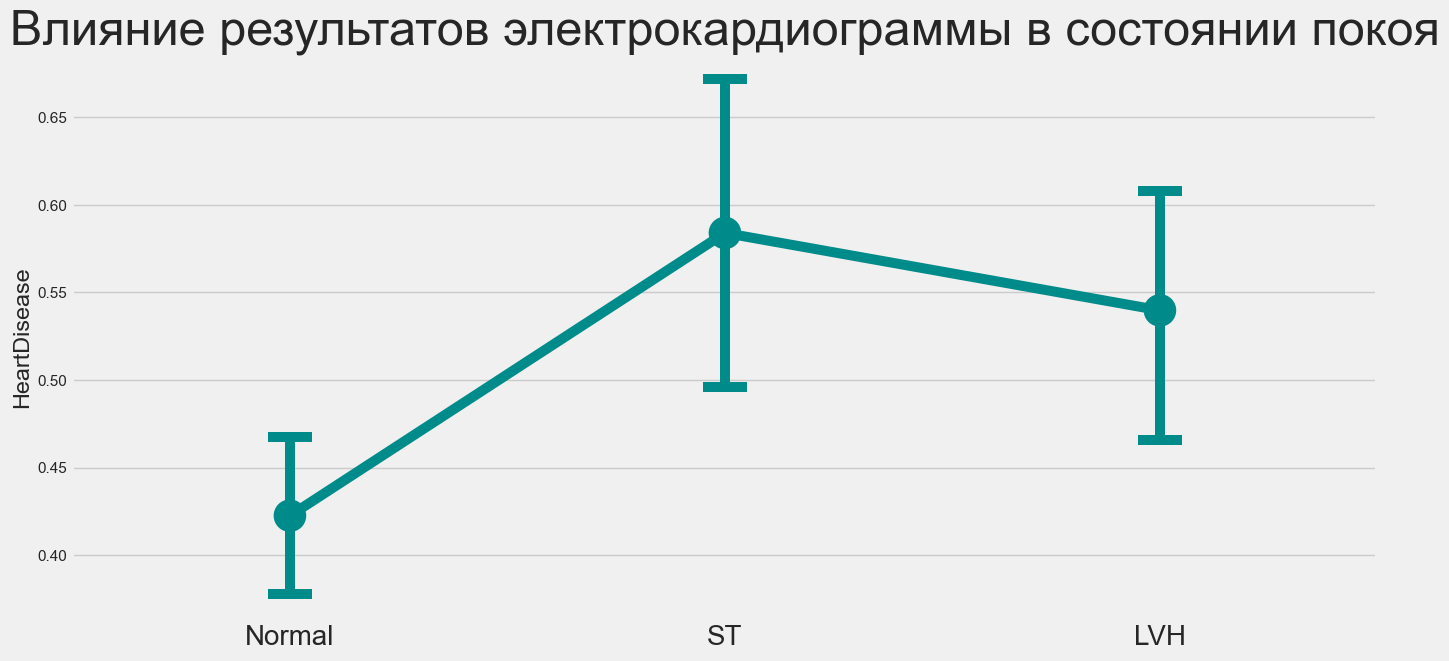

In [117]:
def cardio_plot(data, col_name):

    cardio_data = data[[col_name, 'HeartDisease']]

    color = np.random.choice(colors, 1)[0]
    plt.figure(figsize=(15, 7))
    cardio = sns.pointplot(x=col_name, y='HeartDisease',
                           dodge=0.1, capsize=.1,
                           data=cardio_data,
                           color=color)
    cardio.set_title('Влияние результатов электрокардиограммы в состоянии покоя',
                            fontsize=35)
    cardio.set(xlabel=None)
    cardio.set_xticklabels(cardio.get_xticklabels(), size=20)


cardio_plot(data, 'RestingECG')

### Максимальный сердечный ритм

Skewness of Maximum heart rate =======>>> -0.165


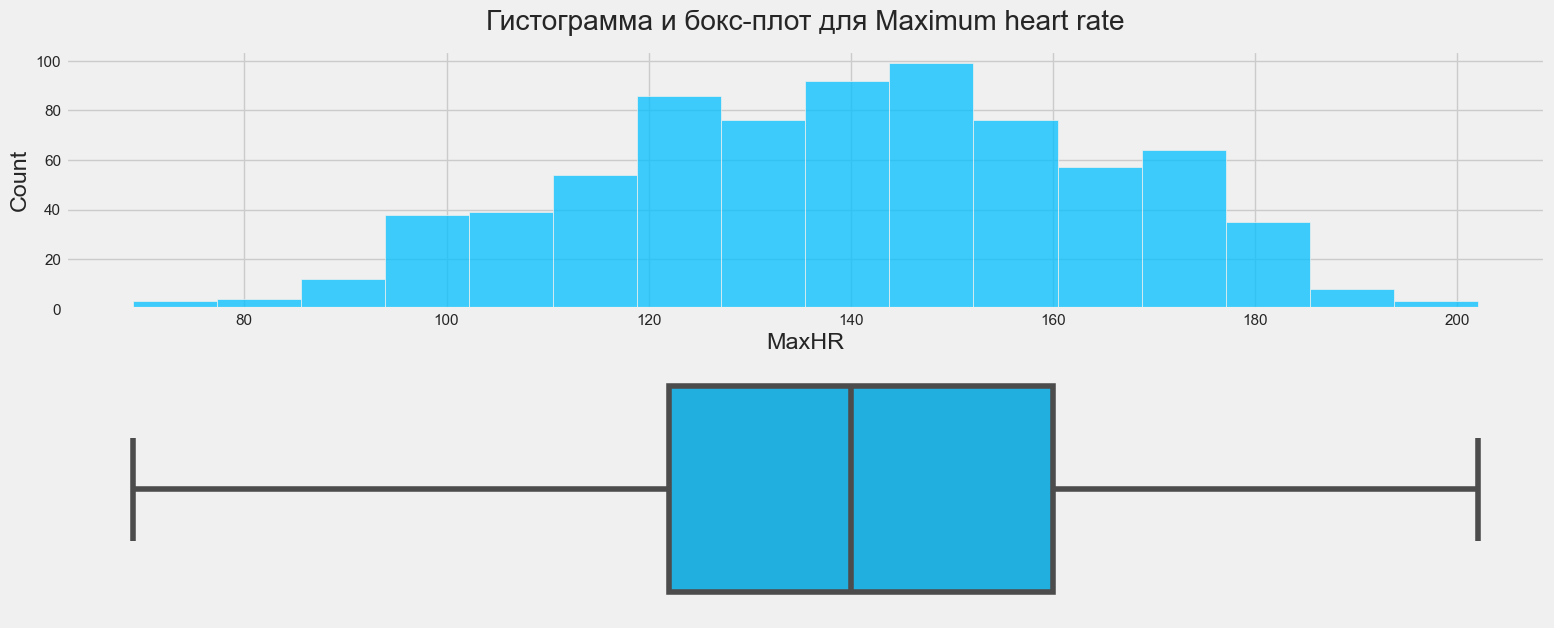

In [118]:
distribution_plot(data.MaxHR, 'Maximum heart rate')

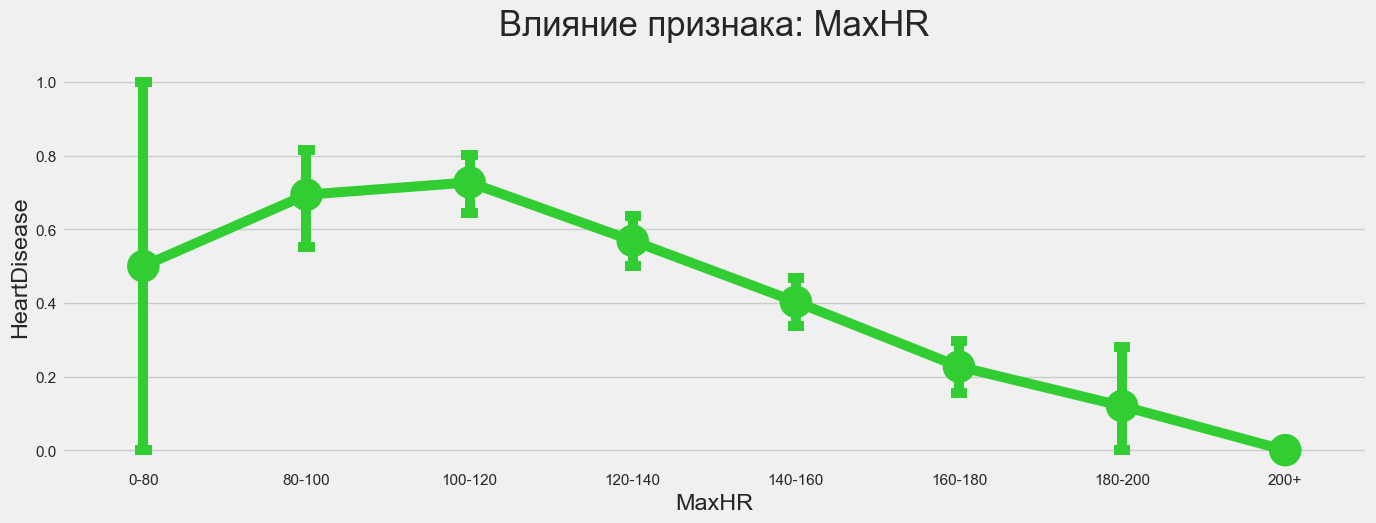

In [119]:

def max_hr_plot(data, col_name):

    max_hr_data = data[[col_name, 'HeartDisease']]
    max_hr_data[col_name] = pd.cut(max_hr_data[col_name],
                               bins=[0, 80, 100, 120, 140, 160, 180, 200,
                                     1000],
                               labels=['0-80',
                                       '80-100',
                                       '100-120',
                                       '120-140',
                                       '140-160',
                                       '160-180',
                                       '180-200',
                                       '200+'])

    color = np.random.choice(colors, 1)[0]
    plt.figure(figsize=(15, 5))
    sns.pointplot(x=col_name, y='HeartDisease',
                  dodge=0.1, capsize=.1, data=max_hr_data, color=color) \
                 .set_title(f'Влияние признака: {col_name}', fontsize=25, y=1.05)


max_hr_plot(data, 'MaxHR')

#### Пояснение:
Можно оценить  максимальный пульс в зависимости возраста.
Чтобы оценить максимальную возрастную частоту сердцебиения, необходимо вычесть возраст от 220.

Из анализа зависимости между признаком «максимальный сердечный ритм» и целевой переменной «наличие сердечно-сосудистых заболеваний» можно сделать вывод, что люди, страдающие от сердечно-сосудистых заболеваний, имеют более низкий максимальный сердечный ритм по сравнению с теми, кто не страдает от этих заболеваний.




### Стенокардия при двигатлельной активности

[Text(0, 0, 'Нет'), Text(1, 0, 'Есть')]

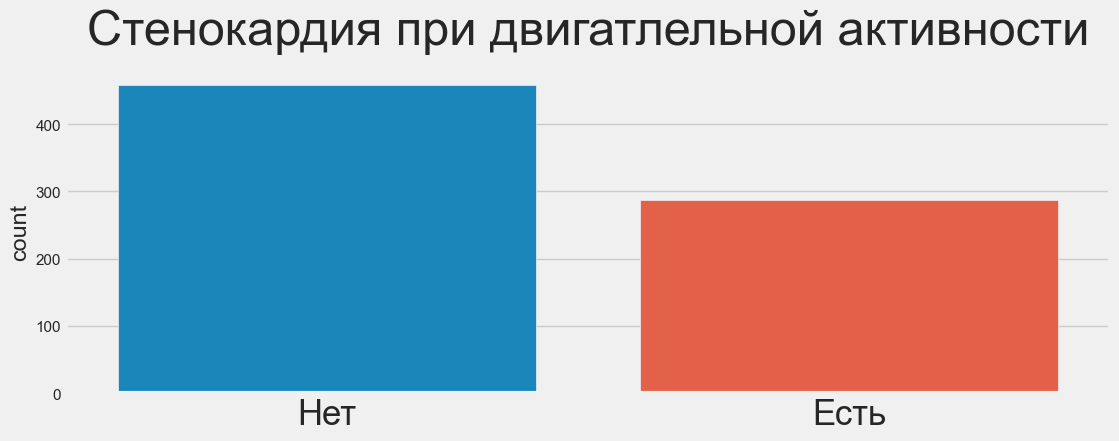

In [120]:
plt.figure(figsize=(12, 4))
exercise_angina_plot = sns.countplot(x=data.ExerciseAngina)
exercise_angina_plot.set_title('Стенокардия при двигатлельной активности', fontsize=35, y=1.05)
exercise_angina_plot.set(xlabel=None)
exercise_angina_plot.set_xticklabels(['Нет', 'Есть'], size=25)

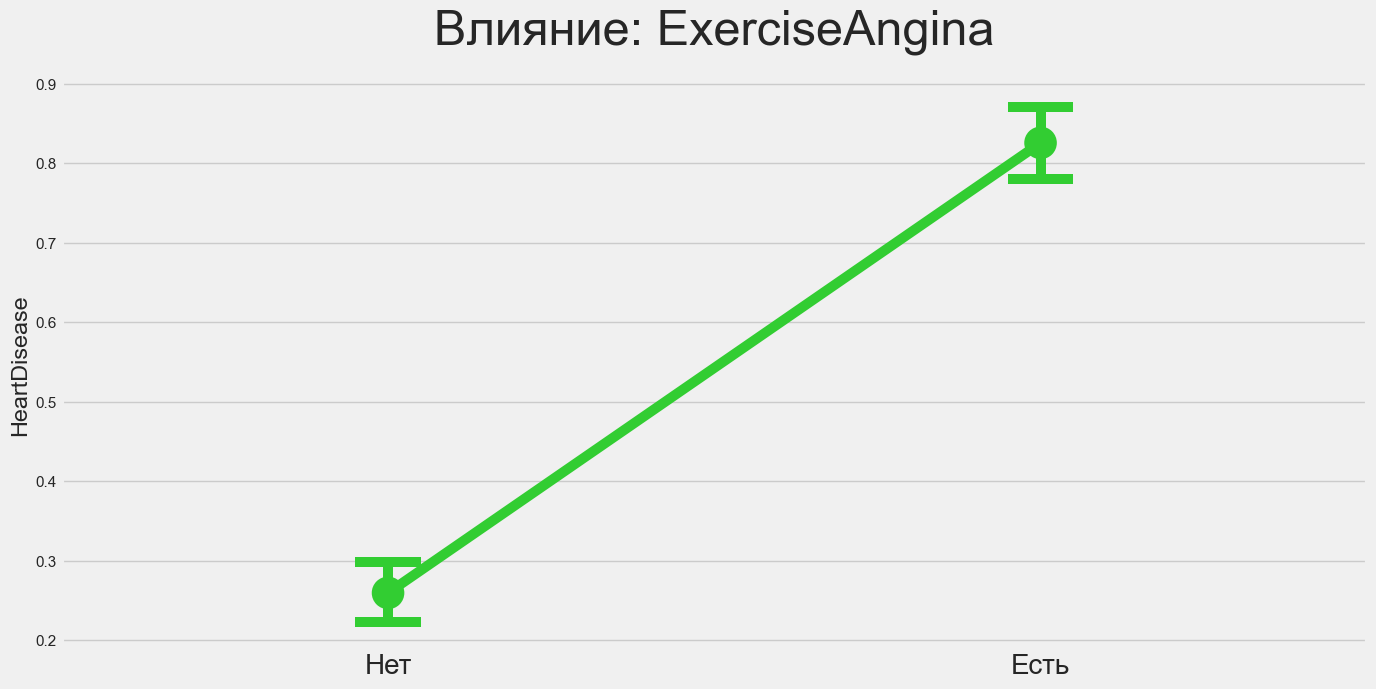

In [121]:
def angina_plot(data, col_name):

    angina_data = data[[col_name, 'HeartDisease']]

    color = np.random.choice(colors, 1)[0]
    plt.figure(figsize=(15, 7))
    angina = sns.pointplot(x=col_name, y='HeartDisease',
                           dodge=0.1, capsize=.1,
                           data=angina_data,
                           color=color)
    angina.set_title(f'Влияние: {col_name}',
                            fontsize=35, y=1.05)
    angina.set(xlabel=None)
    angina.set_xticklabels(['Нет', 'Есть'], size=20)


angina_plot(data, 'ExerciseAngina')

### По графику видно, что отсутствие стенокардии при двигательной активности оказывает влияние на предрасположенность к сердечно-сосудистым заболеваниям

### Oldpeak
Это депрессия ST, вызванная упражнениями относительно отдыха.

Skewness of Oldpeak =======>>> 1.219


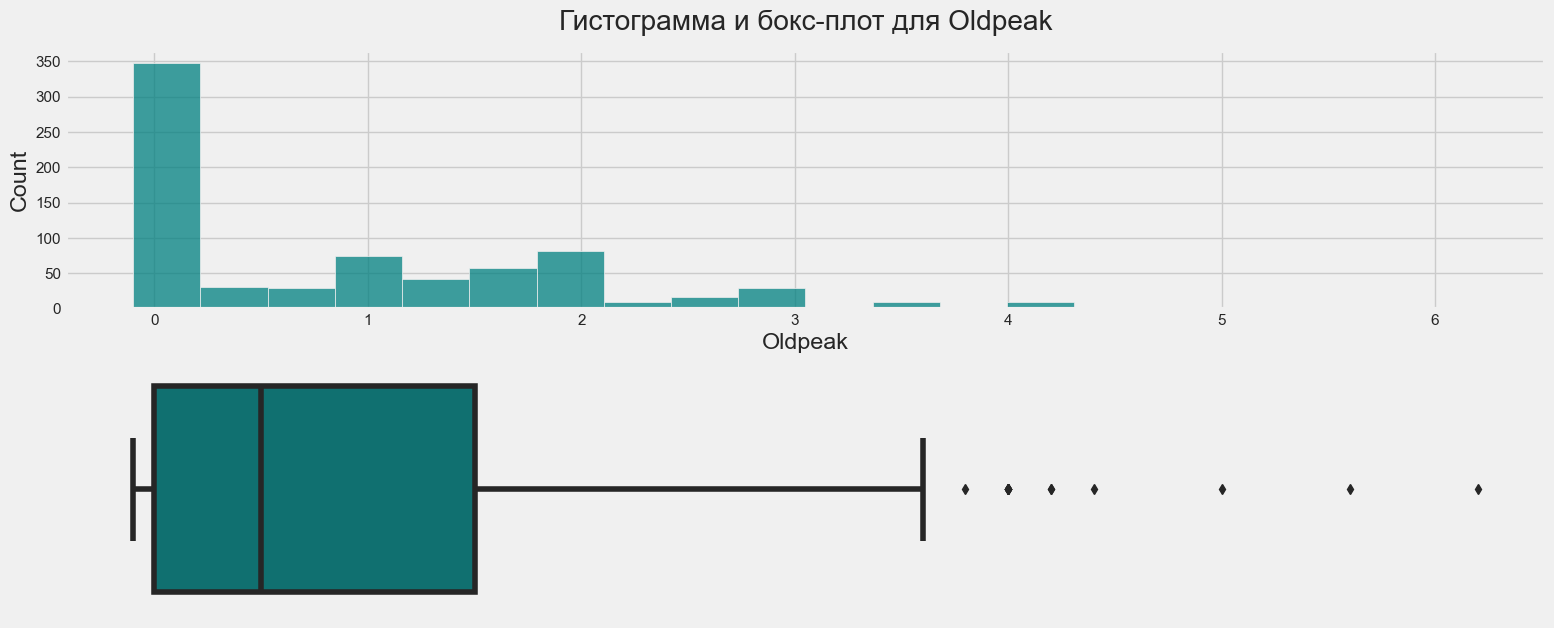

In [122]:
distribution_plot(data.Oldpeak, 'Oldpeak')

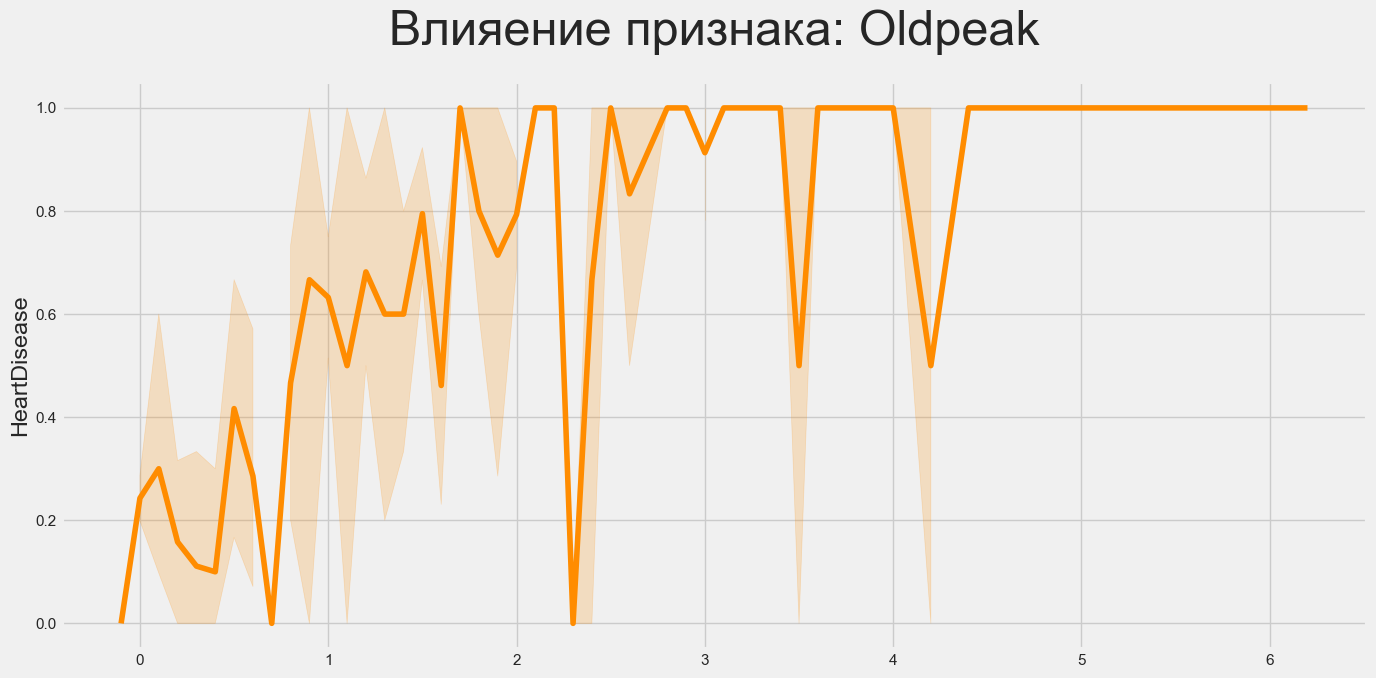

In [123]:
def oldpeak_plot(data, col_name):

    oldpeak_data = data[[col_name, 'HeartDisease']]

    color = np.random.choice(colors, 1)[0]
    plt.figure(figsize=(15, 7))
    oldpeak = sns.lineplot(x=col_name, y='HeartDisease',
                           data=oldpeak_data,
                           color=color)
    oldpeak.set_title(f'Влияение признака: {col_name}',
                            fontsize=35, y=1.05)
    oldpeak.set(xlabel=None)


oldpeak_plot(data, 'Oldpeak')

### Уклон пикового упражнения ST сегмент
- Up   -> Возрастающая линия
- Flat -> Нет наклона (горизонтальное положение)
- Down -> Нисподающая линия

[None, None, None, None, None, None]

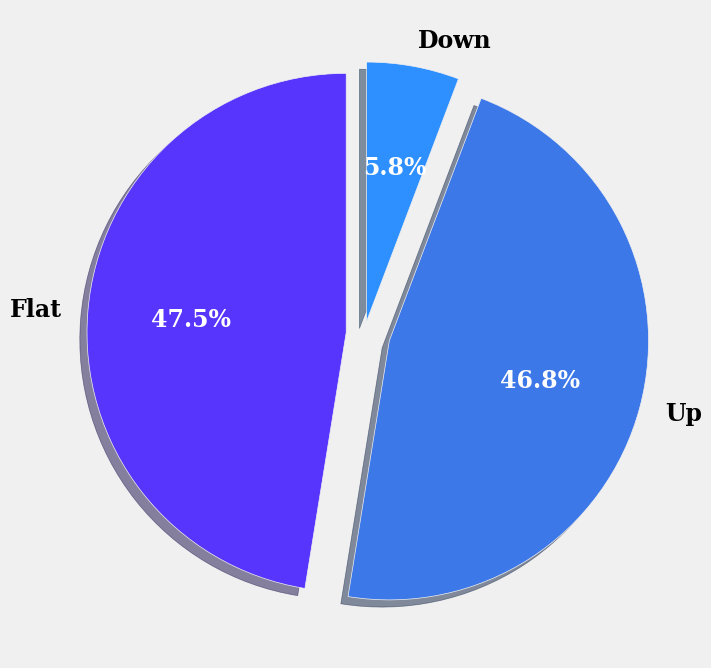

In [124]:
st_slope_data = data.ST_Slope.value_counts()

explode = (0.07, 0.1, 0.05)
pie_colors = ('#5735FD', '#3C78E8', '#2E90FF')

plt.figure(figsize=(12, 8))
patches, texts, pcts = plt.pie(st_slope_data,
        labels=st_slope_data.index,
        explode=explode,
        colors=pie_colors,
        shadow=True,
        startangle=90,
        autopct='%1.1f%%',
        textprops={'fontsize': 17,
                   'color': 'black',
                   'weight': 'bold',
                   'family': 'serif'})
plt.setp(pcts, color='white')

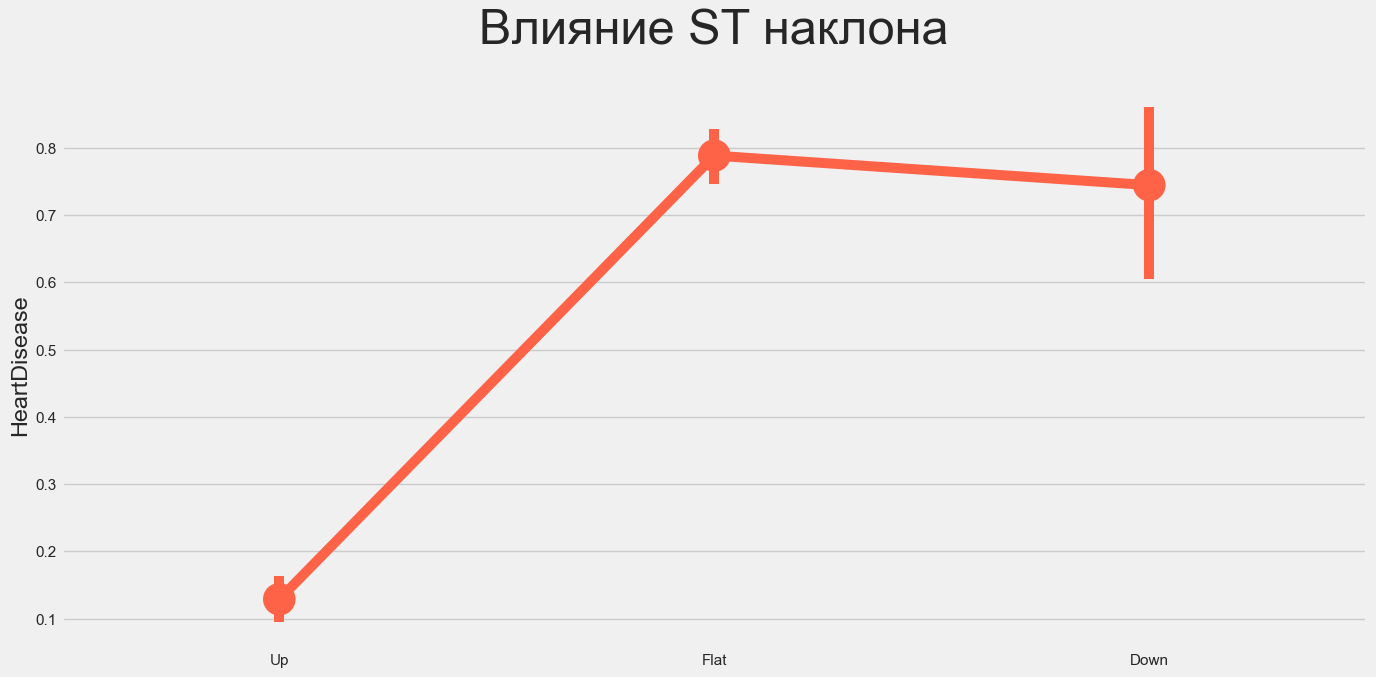

In [125]:

def st_slope_plot(data, col_name):

    st_slope_data = data[[col_name, 'HeartDisease']]

    color = np.random.choice(colors, 1)[0]
    plt.figure(figsize=(15, 7))
    st_slope = sns.pointplot(x=col_name, y='HeartDisease',
                           data=st_slope_data,
                           color=color)
    st_slope.set_title('Влияние ST наклона',
                            fontsize=35, y=1.05)
    st_slope.set(xlabel=None)


st_slope_plot(data, 'ST_Slope')

### Работа с категориальными переменными

In [126]:
cat_columns = [cname for cname in data.columns
                        if data[cname].dtype == 'object']

encoder = preprocessing.LabelEncoder()

for col in cat_columns:
    data[col] = encoder.fit_transform(data[col])

## Тепловая карта

<AxesSubplot:>

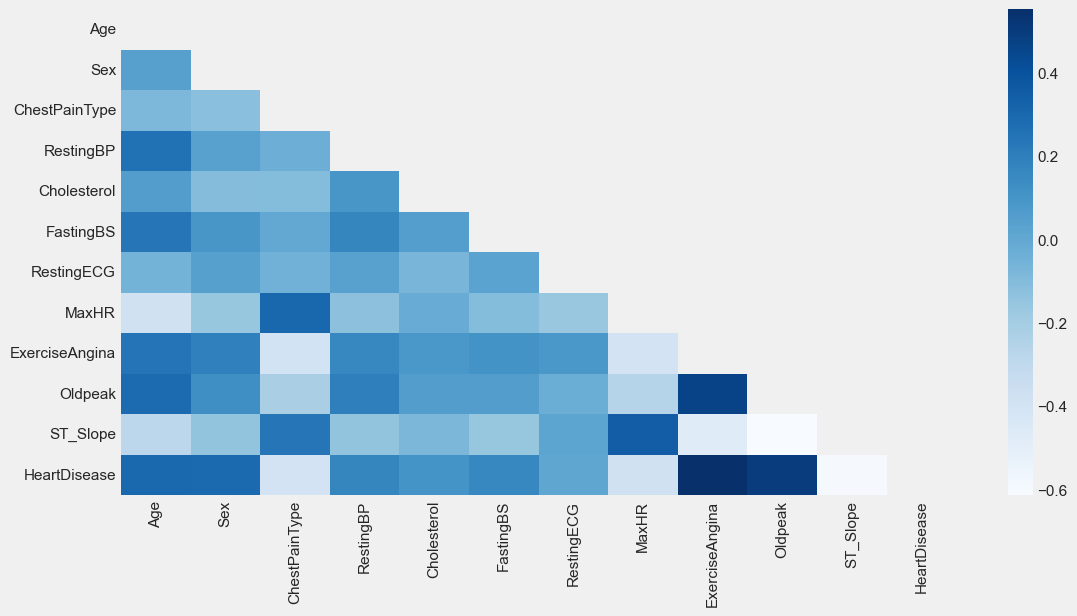

In [129]:
plt.figure(figsize=(12, 6))

corr_mask = np.triu(data.corr())
h_map = sns.heatmap(data.corr(), mask=corr_mask, cmap='Blues')
h_map

### Conclusions from the heat map:
The highest correlation coefficients with predicted values have ExerciseAngina and Oldpeak